In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [6]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([ 0.17655059])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[  85.41580963,   85.41580963,   85.41580963, ...,   85.41580963,
          85.41580963,   85.41580963],
       [  85.7506166 ,   87.20447553,   84.93018648, ...,   85.99530659,
          84.17962304,   85.89759306],
       [  87.35267867,   87.70732318,   85.16022549, ...,   86.77672463,
          84.31646008,   86.74296798],
       ..., 
       [  80.58287006,   72.64790289,  113.99565624, ...,   85.55655981,
          86.63411717,  105.24098191],
       [  81.00401941,   72.67280372,  115.10387219, ...,   86.9910833 ,
          85.59451871,  106.14306442],
       [  81.78896554,   72.36818255,  114.76092918, ...,   86.28328908,
          86.61144991,  105.97788485]])

In [12]:
S.shape

(251L, 10000L)

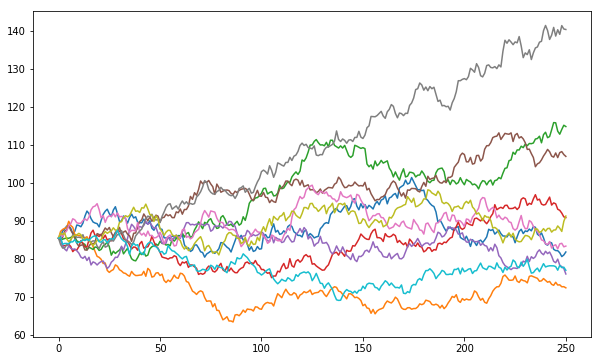

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);